In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import math
from sklearn.metrics import mean_squared_error
from itertools import product
import seaborn; seaborn.set()
%matplotlib inline

import json
import requests

In [168]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')

# Adding weighted price

hist['Weighted_Price'] = (hist.close + hist.high + hist.low + hist.open)/4

In [169]:
#hist = hist['2016-10-01':'2018-01-08']

In [170]:
hist.head()

,close,high,low,open,volumefrom,volumeto,Weighted_Price
time,,,,,,,
2013-11-24,795.01,854.99,745.21,832.50,25948.64,20776035.16,806.9275
2013-11-25,829.99,849.99,758.95,795.01,26381.41,21438670.96,808.4850
2013-11-26,969.96,974.96,825.08,829.99,31613.86,28285852.13,899.9975
2013-11-27,1079.89,1094.78,914.27,969.96,37859.08,37868643.04,1014.7250
2013-11-28,1101.38,1224.48,1032.06,1079.89,37396.83,42912383.44,1109.4525


In [171]:
def train_test_split(df, test_size=0.1):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [172]:
train, test = train_test_split(hist, test_size=0.1)

In [173]:
#train=hist[1475280000:1506729600] #from 01-10-2016 - 30-09-17
#test=hist[1506816000:1533686400]

In [174]:
#train=hist['2016-10-01':'2017-09-30'] #from 01-10-2016 - 30-09-17
#test=hist['2017-10-01':] 

In [175]:
train.head()

,close,high,low,open,volumefrom,volumeto,Weighted_Price
time,,,,,,,
2013-11-24,795.01,854.99,745.21,832.50,25948.64,20776035.16,806.9275
2013-11-25,829.99,849.99,758.95,795.01,26381.41,21438670.96,808.4850
2013-11-26,969.96,974.96,825.08,829.99,31613.86,28285852.13,899.9975
2013-11-27,1079.89,1094.78,914.27,969.96,37859.08,37868643.04,1014.7250
2013-11-28,1101.38,1224.48,1032.06,1079.89,37396.83,42912383.44,1109.4525


In [176]:
test.head()

,close,high,low,open,volumefrom,volumeto,Weighted_Price
time,,,,,,,
2018-10-30,6309.11,6340.68,6286.30,6314.38,42701.22,2.695922e+08,6312.6175
2018-10-31,6342.61,6391.25,6241.49,6309.11,38823.41,2.453572e+08,6321.1150
2018-11-01,6381.30,6402.59,6322.60,6342.81,31397.71,1.998612e+08,6362.3250
2018-11-02,6394.66,6420.93,6371.57,6381.30,27987.60,1.793856e+08,6392.1150
2018-11-03,6376.32,6398.09,6336.96,6394.65,28808.38,1.835653e+08,6376.5050


In [177]:
print(train.shape)
print(test.shape)

(1801, 7)
(200, 7)


In [178]:
train.describe()

,close,high,low,open,volumefrom,volumeto,Weighted_Price
count,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1.801000e+03,1801.000000
mean,2470.155875,2551.024947,2370.620272,2467.121899,65276.309489,2.449847e+08,2464.730748
std,3526.109140,3664.672429,3348.707837,3525.182048,57444.720884,5.151137e+08,3513.891181
min,111.560000,160.150000,91.660000,111.560000,404.380000,2.101127e+05,118.822500
25%,384.690000,395.730000,374.260000,384.690000,26952.730000,1.120408e+07,386.670000
50%,625.570000,637.600000,614.880000,625.570000,52093.800000,2.624220e+07,624.165000
75%,3232.030000,3295.070000,2875.910000,2973.450000,87651.140000,2.597085e+08,3090.302500
max,19345.490000,19870.620000,18750.910000,19346.600000,517733.910000,6.245732e+09,19258.460000


In [179]:
train.isnull().any()

close             False
high              False
low               False
open              False
volumefrom        False
volumeto          False
Weighted_Price    False
dtype: bool

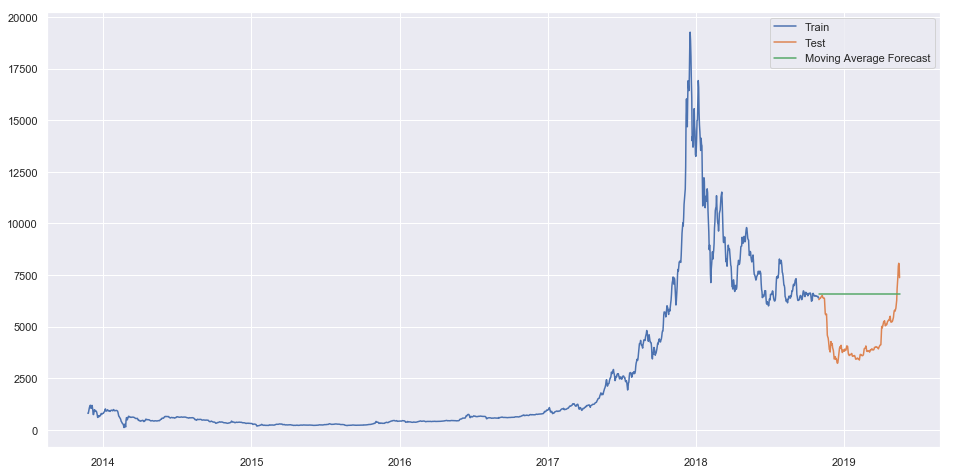

In [180]:
y_hat_avg = test.copy()
# SELECTING DATA FROM ROW NUMBERS
y_hat_avg['moving_avg_forecast'] = train['Weighted_Price'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Weighted_Price'], label='Train')
plt.plot(test['Weighted_Price'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

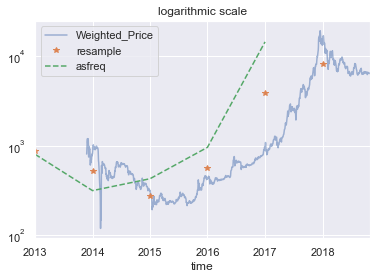

In [181]:
#Resampling at lower frequency
#plot the average of price in the previous year and price at the end of the year
weighted_Price = train['Weighted_Price']
#print(weighted_Price)
weighted_Price.plot(alpha=0.5, style='-')
weighted_Price.resample('BA').mean().plot(style='*') # avg of previous year
weighted_Price.asfreq('BA').plot(style='--') # value at the end of the year
plt.yscale('log')
plt.title("logarithmic scale")
plt.legend(['Weighted_Price', 'resample', 'asfreq'], 
           loc='upper left')
# 'resample'-- average of the previous year
# 'asfreq' -- value at the end of the year

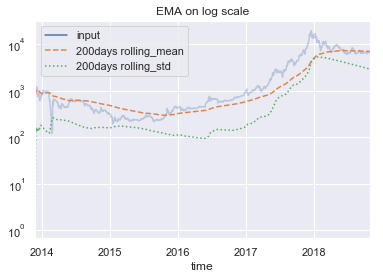

In [182]:
#The Exponentially Weighted Moving Average (EWMA) is a statistic for monitoring the process that averages the data in a way 
#that gives less and less weight to data
rolling = pd.DataFrame.ewm(weighted_Price, com=200)
# center of mass : 
data = pd.DataFrame({'input': weighted_Price, 
                     '200days rolling_mean': rolling.mean(), 
                     '200days rolling_std': rolling.std()}) # moving avg : smoothning the data due to fluationi

ax = data.plot(style=['-', '--', ':'])
ax.set_yscale('log')
ax.set_title("EMA on log scale")
ax.lines[0].set_alpha(0.3)

In [183]:
#autoregression: 
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

test = test['Weighted_Price'].values

print(test)

[6312.6175 6321.115  6362.325  6392.115  6376.505  6423.42   6445.82
 6452.155  6512.195  6489.4225 6408.6175 6392.6125 6386.2825 6392.385
 6354.815  5981.5675 5613.955  5599.545  5570.655  5613.1275 5199.4675
 4593.31   4509.995  4462.9125 4310.1925 4092.6825 3893.5575 3878.14
 3774.9425 4077.0125 4281.32   4135.9725 4114.85   4184.505  3992.365
 3918.3625 3841.74   3643.515  3432.465  3444.835  3552.2475 3530.565
 3425.185  3453.115  3389.3175 3263.7    3227.32   3258.7775 3420.5675
 3618.3725 3778.915  3953.135  4028.845  3963.405  4035.7275 4099.8875
 3936.535  3838.575  3751.545  3807.5225 3880.86   3844.8125 3812.34
 3815.8075 3914.26   3885.2875 3848.8625 3874.375  3983.1225 4071.805
 4059.4125 4048.75   3858.1625 3670.8625 3659.225  3604.765  3637.1375
 3659.9825 3645.245  3652.8725 3659.795  3705.115  3645.3525 3568.6675
 3570.855  3587.3    3583.35   3582.0625 3608.6025 3569.715  3497.155
 3426.015  3442.5775 3455.9875 3443.3175 3482.665  3474.2875 3445.2175
 3435.6125 3416.0

In [184]:
train_pr = train['Weighted_Price'].values

In [185]:
#train and fit autoregression
model = AR(train_pr)
model_fit = model.fit()

print("Lag: %s" % model_fit.k_ar)
print("Coefficients: %s" % model_fit.params)

pred = model_fit.predict(start=len(train), end=len(train_pr)+len(test)-1, dynamic=False)
mse = mean_squared_error(test, pred)
print("Test MSE {0:.3f}".format(mse))

Lag: 25
Coefficients: [ 6.25114175e+00  1.46861161e+00 -6.65423642e-01  2.37682327e-01
 -2.25056656e-02  2.50425573e-02 -2.26259402e-02 -7.79930430e-02
  1.39904427e-01 -6.78578033e-02  6.80165322e-02 -1.47957323e-01
  1.90448290e-02  2.16639284e-02 -5.02778854e-02  7.78420886e-02
 -7.87418426e-02  1.50985843e-01 -8.93171759e-02  9.98227236e-02
 -3.03155396e-03 -8.02117708e-02  4.02654866e-04 -6.31805537e-03
 -3.09615410e-02  3.23814449e-02]
Test MSE 2543200.917


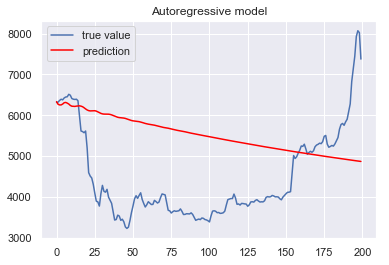

In [186]:
plt.plot(test, label='true value')
plt.plot(pred, color='red', label='prediction')
plt.title("Autoregressive model")
plt.legend()

In [189]:
from sklearn.metrics import r2_score

print(r2_score(test, pred))

-1.182925491529332


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [192]:
np.random.seed(42)

# data params
window_len = 7
test_size = 0.1
zero_base = True

In [194]:
preds = model.predict(test).squeeze()

ValueError: shapes (1776,26) and (200,) not aligned: 26 (dim 1) != 200 (dim 0)

In [193]:
preds = test[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)

line_plot(targets, preds, 'actual', 'prediction', lw=3)

NameError: name 'preds' is not defined